**Read instructions carefully**

- rules about literal assignments continue to apply (make sure you understand them!!!)
- cells for code are marked with comments like # code cell for Problem X
- literal assignment cells are marked with comments like # literal assignment cell for Problem X
- please do not remove those comments

**Geometric Brownian Motion**

Suppose we have a Brownian motion with drift process $X_t, t>0$ with the property that $\log(X_t)$ is Brownian motion
with drift

- starting at time 0 at $\log(X_0)$
- drift rate $\mu$
- volatility parameter $\sigma$

is said to be geometric Brownian motion (GBM) with 

- starting at time 0 at $X_0$
- drift rate $\mu$
- volatility parameter $\sigma$

Equivalently, we can write

$$
X_t = X_0e^{\mu t + \sigma B_t}
$$

where $B_t$ is Brownian motion starting at 0.

Below, we create some realizations where 

- $X_0 = 5.$
- $\mu = .2$
- $\sigma = .3$

and plot them.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
def BMrealization(B0,T,N):
    Delta=T/N
    rtDelta=np.sqrt(Delta)
    delta=np.random.normal(0,1,size=N)
    delta=np.insert(delta,0,B0/rtDelta)
    B=np.cumsum(delta)*rtDelta
    T=np.linspace(0,T,N+1)
    return T,B

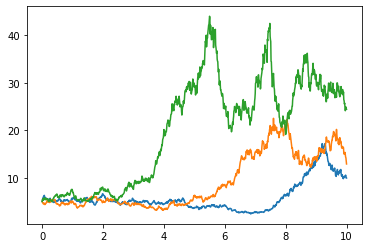

In [2]:
T,B=BMrealization(0,10,1000)
X1=.2*T+.3*B
T,B=BMrealization(0,10,1000)
X2=.2*T+.3*B
T,B=BMrealization(0,10,1000)
X3=.2*T+.3*B

G1=5*np.exp(X1)
G2=5*np.exp(X2)
G3=5*np.exp(X3)

plt.plot(T,G1)
plt.plot(T,G2)
plt.plot(T,G3)


**Asset prices**

Geometric Brownian motion (GBM) is often found to be useful in modeling asset prices. 

Typically, a model is *calibrated*, meaning parameters like $\mu$ and $\sigma$ are estimated, based on historical data.

Once we have in our hands a calibrated model, we can come up with answers to questions such as: 

    "What is the chance that the price will double in the next 20 years."
    
Of course, we need to be careful about our assumptions (who could have predicted the 2008 financial crisis, or war in Ukraine, etc.?), but at least we have a framework for making *educated* guesses about the future. 

**Calibrating the 1-d GBM Model and differences of log series**

Suppose $X_t$ is geometric Brownian motion with drift parameter $\mu$ and volatility parameter $\sigma,$
so that 
$$
\log X_t = \log X_0 + \mu t + \sigma B_t,
$$

For any $0=t_0 < t_1 < \ldots < t_m$ the differences of logs

$$
\log X_{t_i}- \log X_{t_{i-1}} = \mu(t_i-t_{i-1}) + \sigma (B_{t_i}-B_{t_{i-1}}).
$$

have a known joint distribution:

- $\log X_{t_i}- \log X_{t_{i-1}}$ is normally distributed with mean $\mu(t_i-t_{i-1})$ and variance $\sigma^2 (t_i-t_{i-1})$ for $i=1,\ldots,m.$

- the $\log X_{t_i}- \log X_{t_{i-1}}$ are independent for $i=1,\ldots,m.$


To calibrate the 1-d GBM model, assume we have observations of a GBM at equispaced times

$$
X_0, X_\Delta, X_{2\Delta}, \ldots, X_{N\Delta}
$$

we take **natural** logs and then take differences

$$
U_j = \log X_{j\Delta} - \log X_{(j-1)\Delta}, \mbox{ for } j=1,\ldots,N.
$$

(In modeling using a GBM model, we will often reduce from a series $X_0,\ldots,X_N$ to a **differences of logs** series
$U_1,\ldots,U_N.$)

From the remark above these $U_1,\ldots,U_N$ are iid normally distributed random variables with 

- mean $\mu\Delta$ and
- variance $\sigma^2 \Delta.$


From now on, we can decide to measure time using any units we like, so we take our time unit to be  $\Delta=1$ and our differences of logs will have

- mean $\mu$ and
- variance $\sigma^2.$


Be careful! If we decide to use a different time unit, it affects the values of the parameters. (Think of the drift as telling us a change per unit time, so if we measure time in weeks vs. years we'd need to correct by a factor of $1/52.$)


To calibrate the model, we can take as estimates the sample mean of the differences of logs
$$
\hat{\mu} = \overline{U} = \frac{1}{N} \sum_{i=1}^N U_i
$$

and the sample standard deviation of the differences of logs

$$
\hat{\sigma} = \sqrt{S^2} 
$$

where as usual

$$ 
S^2 = \frac{1}{N-1} \sum_{i=1}^N (U_i-\overline{U})^2.
$$

**Confidence Intervals**

Since the $U_i$ are iid $N(\mu,\sigma^2),$
we can get a 95% confidence interval for $\mu$ using the usual 

$$
\hat{\mu} \pm 1.96 \hat{\sigma}/\sqrt{N}.
$$

To get a confidence interval for $\sigma$ you may recall that for a sample of size $N$ from a $N(\mu,\sigma^2)$ distribution that

$$
(N-1) S^2/\sigma^2
$$

has a $\chi^2$ distribution with $N-1$ degrees of freedom. So if we take $x_1$ to be the 2.5% quantile and $x_2$ to be the 97.5% quantile of that distribution (see figure)

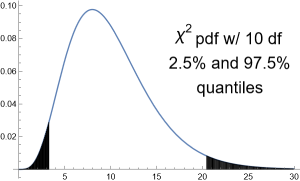

then

$$
P\left[x_1 \leq (N-1) S^2/\sigma^2 \leq x_2\right] = .95
$$

giving

$$
P\left[\sqrt{\frac{(N-1)S^2}{x_2}} \leq \sigma \leq \sqrt{\frac{(N-1) S^2}{x_1}}\right] = .95
$$

so we get as a 95% confidence interval lower bound

$$
\sqrt{\frac{(N-1)S^2}{x_2}},
$$

and upper bound

$$\sqrt{\frac{(N-1)S^2}{x_1}}.$$

Critical points of the $\chi^2$ distribution with $\nu$ degrees of freedom can be obtained using a function from scipy.stats.
For example, we compute the 2.5% and 97.5% quantiles of the $\chi^2$ distribution with 10 degrees of freedom as follows.

In [3]:
from scipy.stats import chi2
chi2.ppf([.025,.975], 10)

array([ 3.24697278, 20.48317735])

**Problem 1 (5 points): Read in the price data as a 1-d numpy array and plot it**

The file SPY.csv contains the weekly price of an ETF that tracks the S&P500 index.

Read the data from that file and create a 1-d numpy array of weekly prices.

Make a plot of price vs. week. (Weeks can be taken to be 0,1,...).

You can read the data in any way you like but here are some notes on **one method** for reading the prices from the file and ending up with a numpy array of prices

- initialize an empty list of prices
- read the file line by line in a loop 

    - when a line is read in as a string convert the line to a list using the split function
    - after splitting you can extract the price as a string by picking a  particular list element
    - remove the trailing new line character from the price string 
    - convert the price string to a float
    - append the price to the list

- convert the list to a numpy array
    
Use the following cell for your code.

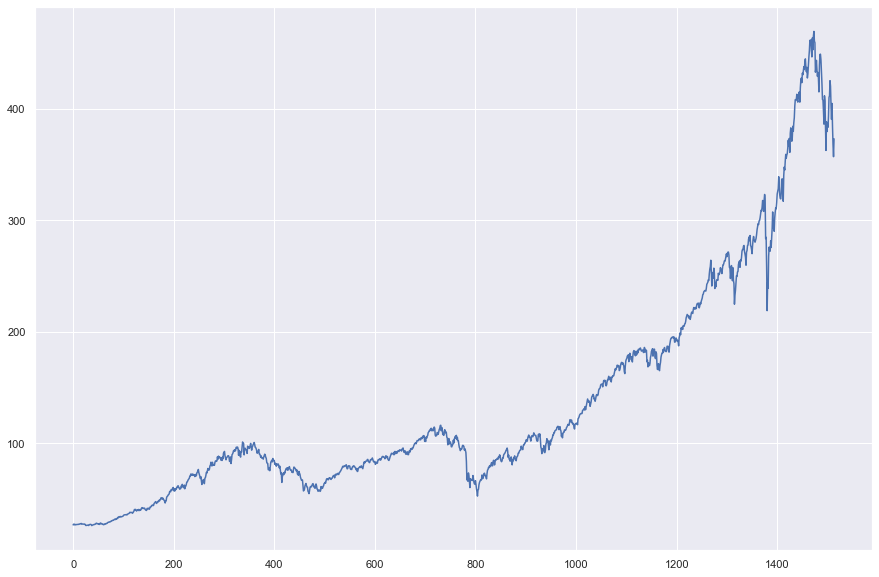

In [42]:
# Code cell for Problem 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/jiangxingnandecomputer/Desktop/SPY.csv')

data = data.loc[:, ['Price']]

data['Index'] = data.index

#convert to 1d array
Price = data.loc[:, ['Price']].values
Index = data.loc[:, ['Index']].values

#print(type(Price))

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(15,10)})
plt.plot(Index, Price)
plt.show()

**Problem 2 (5 points): Calibrate a GBM model for the weekly price series**

Using *week* as the time unit, estimate the paramaters $\mu$ and $\sigma$ for the fitted GBM model using the method described above.

Put your code in the following cell. 

You can use any method that works and gets the right answer.

There is a literal assignment cell after the next one where you should put your literal assignments to some quantities.

In [19]:
# Code cell for Problem 2

from math import log, e
from datetime import date, timedelta
import datetime

# N - 1
N = len(data['log_return'].values.tolist())

#estimate mu and sigma
data['log_price'] = np.log(data['Price'])
data['log_return'] = data['log_price'].diff()

#calc mu
mu = data.log_return.sum() / N

#calc sigma
sigma = np.std(data.log_return)

#mu confidence interval
mulowerbound = mu - 1.96 * sigma / np.sqrt(N)
muupperbound = mu + 1.96 * sigma / np.sqrt(N)

#sigma confidence interval
x1, x2 = chi2.ppf([.025,.975], N - 1)
S_square = sigma ** 2
sigmalowerbound = np.sqrt(((N - 1) * S_square) / x2)
sigmaupperbound = np.sqrt(((N - 1) * S_square) / x1)

print('mu_SPY_est=',round(mu,5))
print('mu_SPY_lower=',round(mulowerbound,5))
print('mu_SPY_upper=',round(muupperbound,5))
print('sigma_SPY_est=',round(sigma,5))
print('sigma_SPY_lower=',round(sigmalowerbound,5))
print('sigma_SPY_upper=',round(sigmaupperbound,5))

mu_SPY_est= 0.00173
mu_SPY_lower= 0.0005
mu_SPY_upper= 0.00297
sigma_SPY_est= 0.02445
sigma_SPY_lower= 0.02361
sigma_SPY_upper= 0.02535


In the following cell give literal floating point assignments to the following variables.

Assignments of values to variables with these names should appear only once in your entire notebook.

Please make an effort to round your answers in a sensible way (but don't ask me how many digits to give).

**mu_SPY_est** = estimate of $\mu$

**mu_SPY_lower** = 95% lower confidence bound for $\mu$

**mu_SPY_upper** = 95% upper confidence bound for $\mu$

**sigma_SPY_est** = estimate of $\sigma$

**sigma_SPY_lower** = 95% lower confidence bound for $\sigma$

**sigma_SPY_upper** = 95% upper confidence bound for $\sigma$


In [20]:
# Literal assignment cell for Problem 2
mu_SPY_est= 0.00173
mu_SPY_lower= 0.0005
mu_SPY_upper= 0.00297
sigma_SPY_est= 0.02445
sigma_SPY_lower= 0.02361
sigma_SPY_upper= 0.02535

**Problem 3 (5 points): Read the MSFT weekly price series into a 1-d numpy array and plot it**

In another file (MSFT.csv) the weekly price history for Microsoft shares during the same time period.

Do the same thing you did in Problem 1 but this time for the MSFT data.

Use the following cell for your code.

In [21]:
# Code cell for Problem 3

msft_data = pd.read_csv('/Users/jiangxingnandecomputer/Desktop/MSFT.csv')

msft_data = msft_data.loc[:, ['Price']]

msft_data['Index'] = msft_data.index


**Problem 4 (5 points): Calibrating a GBM model to MSFT weekly price series**

Calibrate a GBM model for the MSFT weekly price series as you did for the SPY price series. 

Put your code in the following cell and use the subsequent cell to give literal floating point assignments

In [29]:
# Code cell for Problem 4


#estimate mu and sigma
msft_data['log_price'] = np.log(msft_data['Price'])
msft_data['log_return'] = msft_data['log_price'].diff()

#calc mu
msft_mu = msft_data.log_return.sum() / N

#calc sigma
msft_sigma = np.std(msft_data.log_return)

#mu confidence interval
msft_mulowerbound = msft_mu - 1.96 * msft_sigma / np.sqrt(N)
msft_muupperbound = msft_mu + 1.96 * msft_sigma / np.sqrt(N)

#sigma confidence interval
msft_x1, msft_x2 = chi2.ppf([.025,.975], N - 1)
msft_S_square = sigma ** 2
msft_sigmalowerbound = msft_sigma * np.sqrt(((N - 1)) / msft_x2)
msft_sigmaupperbound = msft_sigma * np.sqrt(((N - 1)) / msft_x1)

print('mu_MSFT_est=',round(msft_mu,5))
print('mu_MSFT_lower=',round(msft_mulowerbound,5))
print('mu_MSFT_upper=',round(msft_muupperbound,5))
print('sigma_MSFT_est=',round(msft_sigma,5))
print('sigma_MSFT_lower=',round(msft_sigmalowerbound,5))
print('sigma_MSFT_upper=',round(msft_sigmaupperbound,5))

mu_MSFT_est= 0.00331
mu_MSFT_lower= 0.00129
mu_MSFT_upper= 0.00532
sigma_MSFT_est= 0.03992
sigma_MSFT_lower= 0.03855
sigma_MSFT_upper= 0.0414


In the following cell give literal floating point assignments to the following variables.

Assignments of values to variables with these names should appear **only once** in your entire notebook.

Please make an effort to round your answers in a sensible way (but don't ask me how many digits to give).

**mu_MSFT_est** = estimate of $\mu$

**mu_MSFT_lower** = 95% lower confidence bound for $\mu$

**mu_MSFT_upper** = 95% upper confidence bound for $\mu$

**sigma_MSFT_est** = estimate of $\sigma$

**sigma_MSFT_lower** = 95% lower confidence bound for $\sigma$

**sigma_MSFT_upper** = 95% upper confidence bound for $\sigma$


In [31]:
# Literal assignment cell for Problem 4
mu_MSFT_est= 0.00331
mu_MSFT_lower= 0.00129
mu_MSFT_upper= 0.00532
sigma_MSFT_est= 0.03992
sigma_MSFT_lower= 0.03855
sigma_MSFT_upper= 0.0414

**Investigating dependency 1: the sample correlation coefficient**

Given a sequence of pairs $(U_i,V_i), i=1,\ldots,n$ we define the sample correlation coefficient to be

$$
\hat{\rho} = \frac{\sum_{i=1}^n (U_i - \overline{U})(V_i - \overline{V})}
{\sqrt{\sum_{i=1}^n (U_i-\overline{U})^2\sum_{i=1}^n (V_i-\overline{V})^2}}
$$

where

$$
\overline{U} = \frac{1}{n} \sum_{i=1}^n U_i
$$

and

$$
\overline{V} = \frac{1}{n} \sum_{i=1}^n V_i.
$$

**Investigating dependency 2:  Scatter plots**

It is easy to create scatter plots in matplotlib. 

Here's an example. 

We can create a sample $(U,V)$ from the bivariate normal distribution with parameters $\mu_U,\mu_V,\sigma_U,\sigma_V,$ and $\rho$ by taking

- $U \sim N(\mu_U,\sigma_U)$ 
- $e \sim N(0,1)$ independent of $U,$ and
- $V=\mu_V+\rho\frac{\sigma_V}{\sigma_U} (U-\mu_U)+\sqrt{1-\rho^2}\sigma_V e$$

(If you've never seen this before, try calculating $\mbox{Cov}(U,V).$

Below we scatter plot a sample of N such pairs using parameters $\mu_U=0$, $\mu_V=0$, $\sigma_U=1$, $\sigma_V=1,$ 
for varying values of $\rho$ and we compute the sample correlation matrix.


[[1.         0.94944326]
 [0.94944326 1.        ]]


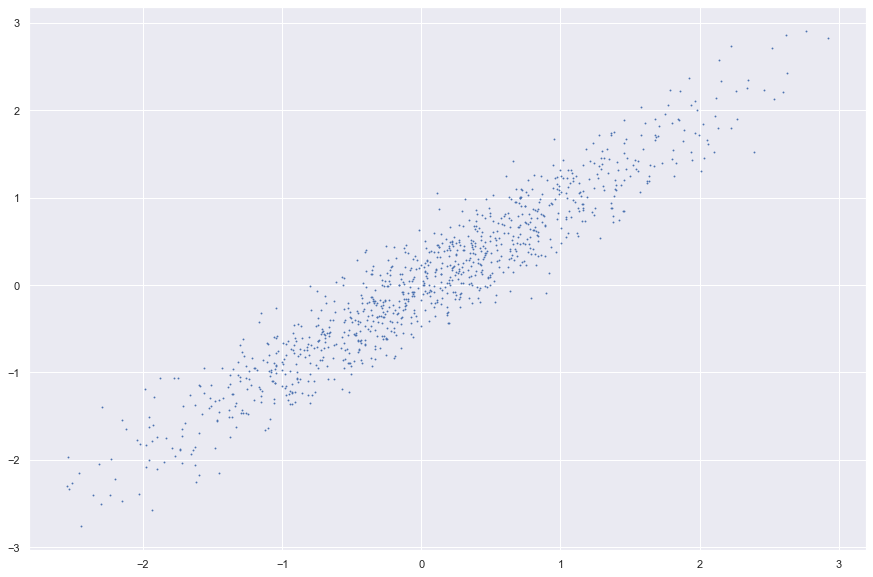

In [32]:
import matplotlib.pyplot as plt
import numpy as np

def demonstrate_correlated_normals(rho,N):
    U=np.random.normal(0,1,N)
    V=rho*U+np.sqrt(1-rho**2)*np.random.normal(0,1,N)
    plt.scatter(U,V,s=.75)
    print(np.corrcoef(U,V))
demonstrate_correlated_normals(.95,1000)

**Problem 5 (5 points) Investigate dependency between pairs of weekly asset price series**

When we have a pair of processes observed for the same time periods, they often exhibit a tendency to change in a dependent fashion i.e. one tends to go up when the other tends to as well does, or one tends to go down when the other goes up.

We explore this for the case of SPY vs. MSFT.

Give a scatter plot the **differences of log** SPY prices vs. the **differences of log** MSFT prices and **compute the sample correlation coefficient between these two differences of log series**.

Use the following cell for your code.

In the subsequent cell give the literal value for the correlation coefficient.

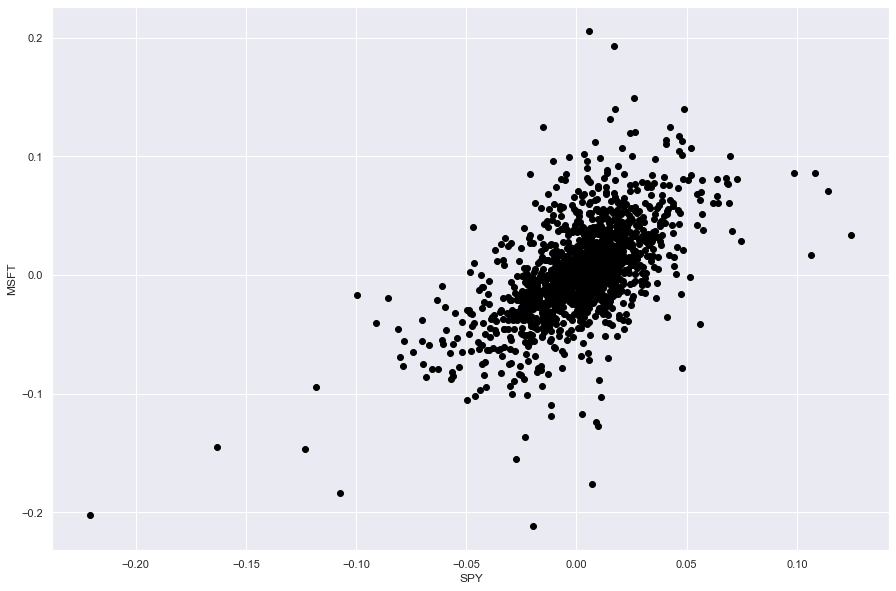

sample_correlation_coefficient= 0.6005


In [33]:
# Code cell for Problem 5
import scipy

plt.xlabel('SPY')
plt.ylabel('MSFT')
plt.plot(data['log_return'], msft_data['log_return'], 'o', color='black');
plt.show()

SPY_MSFT_corr = np.corrcoef(data['log_return'][1:],msft_data['log_return'][1:])

print('sample_correlation_coefficient=',round(SPY_MSFT_corr[1][0], 5))

In the following cell assign a literal floating point value to the variable **sample_correlation_coefficient**.
Please round your answer in a reasonable fashion.

In [34]:
# Literal assignment cell for Problem 5
sample_correlation_coefficient= 0.6005

**Adding independent Brownian motion processes**

Observe that if we have two independent Brownian motion processes $B_t$ and $\tilde{B}_t$ for $t\geq 0,$ then 
the process

$$
\hat{B}_t = c B_t + \sqrt{1-c^2} \tilde{B}_t
$$

defines a Brownian motion process for any constant $c \in [-1,1].$ To explain why, observe that 

- the increments between time
$t$ and $t+dt$ are given by
$$
d\hat{B}_t  = c dB_t + \sqrt{1-c^2} d\tilde{B}_t.
$$
Since $dB_t$ and $d\tilde{B}_t$ are independent and distributed as $N(0,dt)$ is is also that case that $d\hat{B}_t$ has a normal distribution with mean 0 and variance 

$$
\mbox{Var}( c dB_t + \sqrt{1-c^2} d\tilde{B}_t) = c^2 \mbox{Var}(dB_t)dt + (1-c^2) \mbox{Var}(d\tilde{B}_t)dt
+2 c \sqrt{1-c^2} \mbox{Cov}(dB_t,d\tilde{B}_t)
$$

$$
c^2 dt + (1-c^2) dt = dt
$$



- the increments for the $\hat{B}_t$ process are independent because the increments for the $B_t$ and $\tilde{B}_t$ are.



**Bivariate GBM model**

We can define a model for a pair of series in which each series by itself follows a GBM model, but for which the two series exhibit **dependence.**

Here, we take $X_t$ to be GBM starting at $X_0$ with drift parameter $\mu_X$ and volatility paramater $\sigma_X$ so

$$
\log X_t = \log X_0 + \mu_X t + \sigma_X B_t
$$

where, as usual $B_t$ denotes Brownian motion starting from 0, so $\log X_t$ is  
Brownian motion starting at $\log X_0$ with drift parameter $\mu_X$ and volatility paramater $\sigma_X.$ 

We introduce another independent Brownian motion $\tilde{B}_t$ (also starting at 0) and 
define another process $G^{(Y)}_t$ 

$$
\log Y_t = \log Y_0 + \mu_Y t + \sigma_Y \rho B_t + \sigma_Y \sqrt{1-\rho^2} \tilde{B}_t
$$

As a result of the above comment, 

- $\log Y_t$ is Brownian motion starting at $\log Y_0$ with drift parameter $\mu_Y$ and volatility paramater $\sigma_Y,$ and
- $Y_t$ is GBM starting at $Y_0$ with drift parameter $\mu_Y$ and volatility paramater $\sigma_Y.$ 

But we have arranged for the increments between the two processes to be **dependent.** 

Here, 

- the increment of $\log X_t$ from time $t$ to time $dt$ is $\sigma_X dB_t$
- the increment of $\log Y_t$ from time $t$ to time $dt$ is $\sigma_Y \rho dB_t + \sigma_Y \sqrt{1-\rho^2} d\tilde{B}_t.$

The covariance between increments of the log series is then obtained by a calculation very similar to the one above:

$$
\mbox{Cov}(d\log X_t, d\log Y_t) = \mbox{Cov}(\sigma_X dB_t, \sigma_Y\rho dB_t + \sigma_Y\sqrt{1-\rho^2} d\tilde{B}_t)
$$

$$
= \sigma_X\sigma_Y \rho \mbox{Cov}( dB_t, dB_t) + \sigma_X\sigma_Y\sqrt{1-\rho^2}\mbox{Cov}(dB_t,d\tilde{B}_t).
$$

by independence the second term is zero and the first term is the variance of $dB_t,$ so we get a covariance of 

$$
\sigma_X\sigma_Y \rho dt.
$$

Since 

$$
\mbox{Var}(d\log X_t) = \sigma_X^2 dt, ~~~\mbox{Var}(d\log Y_t) = \sigma_Y^2 dt
$$ 

we find that the correlation coefficient between infinitesimal increments of the log series is $\rho.$


**Realizations for the bivariate GBM model**

When a series of values $(X_i,Y_i), i=0,1,\ldots$ equispaced in time  are realized from a **bivariate GBM model** with the following parameters

- $X_0$ the starting value of the $X$-series
- $Y_0$ the starting value of the $Y$-series
- $\mu_X$ the drift parameter of the $X$-series
- $\mu_Y$ the drift parameter of the $Y$-series
- $\sigma_X$ the volatility parameter of the $X$-series
- $\sigma_Y$ the volatility parameter of the $Y$-series
- $\rho$ the correlation coefficient

where the drift and volaility parameters are based on the time unit equalling 1, we can 
create realizations $(X_j,Y_j),~j=0,\ldots,N$ as follows:

We start with $X_0$ and $Y_0$ with the specified values, then our update step consists of generating independent random variables $\delta_1$ and $\delta_2$ whose distributions are $N(0,1)$ and defining 
$$
X_{j+1} = X_j \exp\left( \mu_X + \sigma_X \delta_1\right)
$$

and

$$
Y_{j+1} = Y_j \exp \left(\mu_Y + \rho \sigma_Y \delta_1 + \sqrt{1-\rho^2} \sigma_Y\delta_2 \right)
$$

for $j=0,\ldots,N-1.$



**Calibrating the model**

Now we consider calibration of the above model for a pair of series, based on data observed at equispaced times.

So assume we have a process $(X_t,Y_t),~t\geq 0$ as above and we observe pairs 
$(X_{j\Delta},Y_{j\Delta}),~j=0,\ldots,N$ equispaced in time. 

We estimate the drift and volatility parameters for the $X$ and $Y$ processes separately as before, and **the only remaining task** is estimating the parameter $\rho.$ 

To this end, as above, let
$$
U_j = \log X_{j\Delta} - \log X_{(j-1)\Delta},  
$$

and

$$
V_j = \log Y_{j\Delta} - \log Y_{(j-1)\Delta}
$$

for $j=1,\ldots,N.$ Then

$$
U_j =  \mu_X \Delta + \sigma_X(B_{j\Delta} -B_{(j-1)\Delta})
$$

and

$$
V_j =  \mu_Y \Delta + \sigma_Y\rho (B_{j\Delta} -B_{(j-1)\Delta}) +\sigma_Y\sqrt{1-\rho^2} (\tilde{B}_{j\Delta} -\tilde{B}_{(j-1)\Delta} 
$$

We have 

$$
B_{j\Delta} -B_{(j-1)\Delta} \sim N(0,\Delta)
$$ 

independent of 

$$
\tilde{B}_{j\Delta} -\tilde{B}_{(j-1)\Delta} \sim N(0,\Delta)
$$

so $(U_j,V_j)$ are iid bivariate normal with parameters $\mu_X\Delta, \sigma_X\Delta, \mu_Y\Delta, \sigma_Y\Delta,$ and $\rho.$

As mentioned above, we can take as our time unit $\Delta$ so we can assume $\Delta=1.$

We complete calibration of our *dependent* GBM processes  by estimating $\rho$ using the sample correlation coefficient of the difference of logs series 

$$
\hat{\rho} = \frac{ \sum_{i=1}^n (U_i - \overline{U})(V_i - \overline{V})}
{\sqrt{\sum_{i=1}^n (U_i-\overline{U})^2\sum_{i=1}^n (V_i-\overline{V})^2}}.
$$

as you calculated above.


**Confidence interval for a correlation coefficient**

Given an iid sample of values $(X,Y)$ say 

$$
(X_1,Y_1),\ldots,(X_n,Y_n)
$$

drawn from a bivariate normal distribution 

(see https://en.wikipedia.org/wiki/Multivariate_normal_distribution
bivariate case)

with parameters (5 of them)

$$
\mu_X = E[X], \mu_Y = E[Y], 
$$

$$
\sigma^2_X = \mbox{Var}(X), \sigma^2_Y = \mbox{Var}(Y), 
$$

$$
\rho = \mbox{Cor}(X,Y) = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X\sigma_Y}
$$

the sample correlation correlation coefficient is defined as above

$$
\hat{\rho} = \frac{\sum_{i=1}^n (X_i - \overline{X})(Y_i - \overline{Y})}
{\sqrt{\sum_{i=1}^n (X_i-\overline{X})^2\sum_{i=1}^n (Y_i-\overline{Y})^2}}.
$$


It is known that for large values of $n$ the distribution of 

$$
\sqrt{n-3}\left( \frac{1}{2}\log \left(\frac{1+\hat{\rho}}{1-\hat{\rho}}\right)
- \frac{1}{2}\log \left(\frac{1+\rho}{1-\rho}\right)\right)
$$

is approximately $N(0,1)$ no matter what the true value of $\rho$ happens to be. 
The transformation 

$$
\psi(r) = \frac{1}{2}\log\left(\frac{1+r}{1-r}\right)
$$ 

that makes this work is an example of a *variance stabilizing transformation* and this particular transformation (for the sample correlation coefficient) is referred to as *Fisher's transformation* or *Fisher's z-transformation*.

As a consequence of the statement above, if we pick constants $z_1 < z_2,$ then

$$
P\left[z_1 \leq \sqrt{n-3}(\psi(\hat{\rho}) - \psi(\rho))\leq z_2\right] \approx \Phi(z_2)- \Phi(z_1),
$$

where $\Phi$ denotes the normal cdf. 

The event in the proabability can be re-written so that

$$
P\left[ \frac{z_1}{\sqrt{n-3}}\leq \psi(\hat{\rho}) - \psi(\rho) \leq \frac{z_2}{\sqrt{n-3}}
\right] \approx  \Phi(z_2)- \Phi(z_1),
$$

which is in turn equivalent to

$$
P\left[ \psi(\hat{\rho}) - \frac{z_2}{\sqrt{n-3}}\leq \psi(\rho) \leq \psi(\hat{\rho}) - \frac{z_2}{\sqrt{n-3}} \right] \approx  \Phi(z_2)- \Phi(z_1),
$$

The function $\psi$ is monotone increasing in the interval $(-1,1)$ with inverse function 

$$
\psi^{-1}(x)=\frac{e^{2x}-1}{e^{2x}+1},
$$

and so we have

$$
P\left[ \psi^{-1}\left(\psi(\hat{\rho}) - \frac{z_2}{\sqrt{n-3}}\right) \leq \rho \leq \psi^{-1}\left(\psi(\hat{\rho}) - \frac{z_2}{\sqrt{n-3}}\right)
\right] \approx  \Phi(z_2)- \Phi(z_1),
$$

Taking $z_1 = \Phi^{-1}(.025) \approx -1.96$ and $z_2 = \Phi^{-1}(.975) \approx 1.96$ makes this probability approximately 95% and we get approximate 95% lower and upper bounds

$$
\mbox{95% lower bound for } \rho =  \psi^{-1}\left(\psi(\hat{\rho}) - \frac{1.96}{\sqrt{n-3}}\right)
$$

and

$$
\mbox{95% upper bound for } \rho =   \psi^{-1}\left(\psi(\hat{\rho}) + \frac{1.96}{\sqrt{n-3}}\right)
$$



**Problem 6 (5 points): 95% confidence interval for $\rho$**

Use the above methodology to get a 95% confidence interval for $\rho,$ assuming our SPY and MSFT series satisfy the bivariate GBM model described above. 

Put your code in the following cell. Use the subsequent cell for literal assignments. 

As usual

- do not assign values to these variables anywhere else in this notebook
- use appropriate rounding

In [40]:
# Code cell for Problem 6

def rho_helper(x):
    return (np.exp(2*x)-1)/(np.exp(2*x)+1)

sample = np.corrcoef(data.log_return[1:],msft_data.log_return[1:])[0][1]

rho_1 = np.log((1+sample)/(1-sample))/2

rho_2 = (np.exp(2*sample)-1)/(np.exp(2*sample)+1)

corr_coeff_lowerbound = rho_helper(rho_1 - 1.96 / np.sqrt(N-3))
corr_coeff_upperbound = rho_helper(rho_1 + 1.96 / np.sqrt(N-3))

print('lower_confidence_bound_for_corr_coeff=', round(corr_coeff_lowerbound, 5))
print('upper_confidence_bound_for_corr_coeff=', round(corr_coeff_upperbound, 5)) 

lower_confidence_bound_for_corr_coeff= 0.56728
upper_confidence_bound_for_corr_coeff= 0.63177


Use the following cell to provide literal assignments to the variables

- **lower_confidence_bound_for_corr_coeff**
- **upper_confidence_bound_for_corr_coeff**


In [41]:
# Literal assignment cell for Problem 6
lower_confidence_bound_for_corr_coeff= 0.56728
upper_confidence_bound_for_corr_coeff= 0.63177


**Application of the calibrated bivariate GBM model**

Having calibrated the model, what can we do with it?

Here's an example of a question we might wish to know the answer to. It is 10/4/2022 and we have just observed the historical data for these two price series. We calibrate our bivariate model to the historical data and we want to understand the likelihood of some future event. For example,  

"What is the chance that the MSFT/SPY price ratio ever goes above .8 in the next 52 weeks?"

We can answer this by assuming our GBM model to be correct and to describe the behavior of prices moving forward in time.

We use Monte-Carlo simulation, that is, 

- for M trials 
    - generate 52 weeks of samples from the calibrated GBM model with starting values for SPY and MSFT being the prices observed on 10/3/2022.
    - determine whether the event in question occured
- compute the proportion of trials in which the event occured
- get a confidence interval for the unknown proportion

**Problem 7 (5 points) Generate bivariate GBM realizations**

Write a function called **generate_bivariate_GBM_realizations** that takes as arguments

- X0 = starting value for X series
- Y0 = starting value for Y series
- mx = drift parameter for the X series
- my = drift parameter for the Y series
- sx = volatility parameter for the X series
- sy = volatility parameter for the Y series
- rho = the correlation coefficient
- N = number of time steps after time 0

and that outputs a pair of numpy arrays

- X of length N+1 
- Y of length N+1

giving realizations of the bivariate GBM with the given parameters (see **Realizations for the bivariate GBM model** above).

Put your code in the following cell. Try to make your code run efficiently.

In [53]:
# Code cell for Problem 7

def generate_bivariate_GBM_realizations(X0, Y0, mx, my, sx, sy, rho, N):
    
    #init
    X = []
    Y = []
    
    X.append(X0)
    Y.append(Y0)
    
    for i in range(1, N + 1):
        
        random_1 = np.random.normal(0, 1)
        random_2 = np.random.normal(0, 1)
        
        X_element = X[i-1] * np.exp(mx + sx * random_1)
        Y_element = Y[i-1] * np.exp(my + rho * sy * random_1 + np.sqrt(1 - rho ** 2) * sy * random_2)
        
        X.append(X_element)
        Y.append(Y_element)
        
    return X, Y


#test
X, Y = generate_bivariate_GBM_realizations(
    data.loc[:, ['Price']].values[0],
    msft_data.loc[:, ['Price']].values[0],
    mu_SPY_est,
    mu_MSFT_est,
    sigma_SPY_est,
    sigma_MSFT_est,
    sample_correlation_coefficient,
    52
)


**Problem 8 (5 points) Monte-Carlo simulation**

Assuming the GBM model has been fitted correctly (so make sure you get this right) and accurately reflects the way prices will evolve in the future, generate 10,000 realizations of 52 weeks of future (SPY, MSFT) price pairs and use these to estimate the probability that the ratio 

    MSFT price/SPY price
    
will exceed .8 at any week in the next 52 weeks, and give a confidence interval for this probability. Use the following cell for your code. 
In the subsequent cell you will be asked to provide literal assignments to variables. 

In [56]:
# Code cell for Problem 8

ntrails = 10000
count = 0

for i in range(ntrails):
    X, Y = generate_bivariate_GBM_realizations(
        data.loc[:, ['Price']].values[-1], 
        msft_data.loc[:, ['Price']].values[-1], 
        mu_SPY_est, 
        mu_MSFT_est, 
        sigma_SPY_est, 
        sigma_MSFT_est, 
        sample_correlation_coefficient, 
        52
    )
    
    flag = False
    #check defined situation
    for j in range(len(X)):
        if Y[j] / X[j] > 0.8 and flag == False:
            count+=1
            flag = True

retio_pest = count/ntrails
retio_std = np.sqrt(retio_pest * (1 - retio_pest) / ntrails)
retio_pest_lower = retio_pest - 1.96 * retio_std
retio_pest_upper = retio_pest + 1.96 * retio_std

print("pest=", round(retio_pest, 5))
print('pest_lower=', round(retio_pest_lower, 5)) 
print('pest_upper=', round(retio_pest_upper, 5))

pest= 0.4828
pest_lower= 0.47301
pest_upper= 0.49259


In the following literal assignment cell, assign values to the following variables.

**pest** the probability estimate

**pest_lower** 95% lower bound for the probability estimate

**pestupper** 95% upper bound for the probability estimate

As usual

- round your answers sensibly
- do not assign values to these variables anywhere else in your notebook

In [57]:
# Literal assignment cell for Problem 8
pest= 0.4828
pest_lower= 0.47301
pest_upper= 0.49259
